# ATTENTION: 

Remember to pull before any change and to push often! (Problem on merging)

# Test for project1, sandbox

pour faire plaisir à William, il est demandé de mettre des titres. Faites attention car il a tendance à devenir grumpy si on ne le fait pas 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

sns.set()

In [9]:
from proj1_helpers import *
from data_utility import *


In [13]:
from Regressions import *

### Train Data loading

In [7]:
from proj1_helpers import *

y, X, ids = load_csv_data('../Data/train.csv')
#y, X, ids = load_csv_data('/Users/Marie/Documents/Github/ML_course_Marie/Project_1/all/train.csv')


In [12]:
print('Y shape : ', y.shape)
print('X shape : ', X.shape)

Y shape :  (250000,)
X shape :  (250000, 30)


## which Definition

In [7]:
### Removal of -999 datas

keepers = np.ones(X.shape[1], dtype=bool)
keepers[[4,5,6,12,26,27,28]] = 0

x = X[:,keepers]

print(x.shape)

(250000, 23)


In [9]:
which = [6,17,22]

Scatter plot for 6th feature :


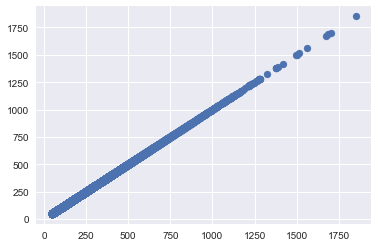

Scatter plot for 17th feature :


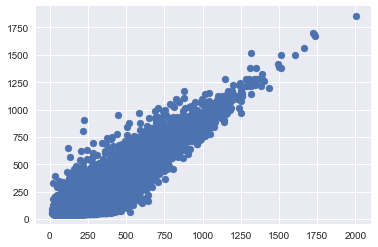

Scatter plot for 22th feature :


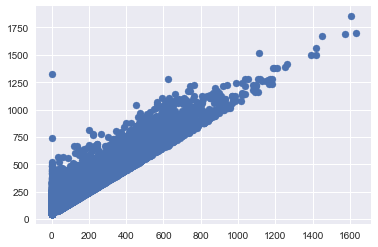

In [12]:
scatter(x,which, other_f= True, against=x[:,6])

### Scatter plots

Scatter plot for 11th feature :


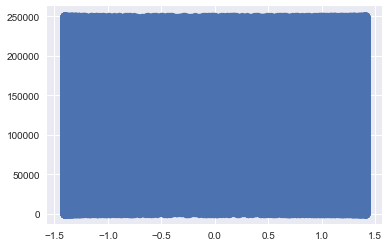

In [11]:
for i in which:
    feature = x[:,i]
    if len(feature[feature==-999]) > 0: #If there is some misplaced value we do not include them in the scatterplot
        print("ATTENTION: missing values in {i}th feature removed!".format(i=i))
    feature = feature[feature>-999]
    plt.scatter(feature, range(len(feature)))
    print("Scatter plot for {i}th feature :".format(i=i))
    plt.show()

### Histograms

In [15]:
def hist_plot(data,i):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=data, bins=50, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('{i}th feature'.format(i=i))
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(top=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()

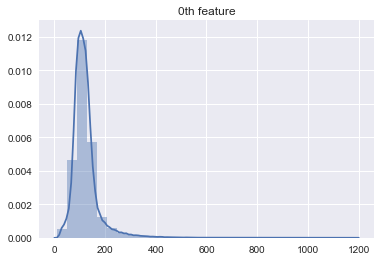

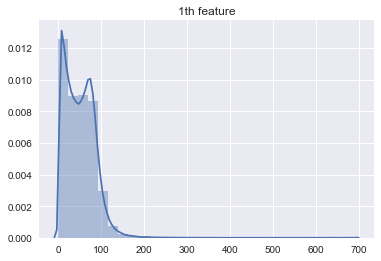

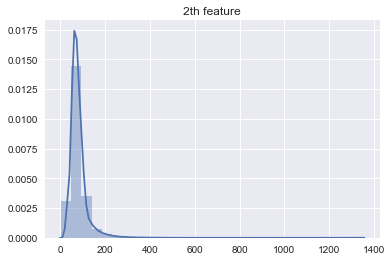

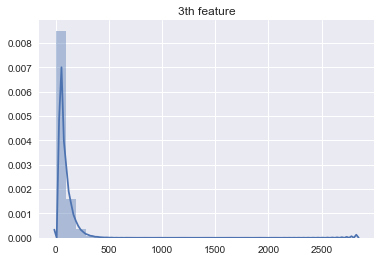

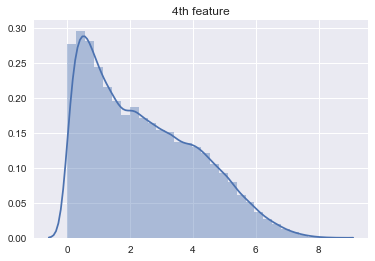

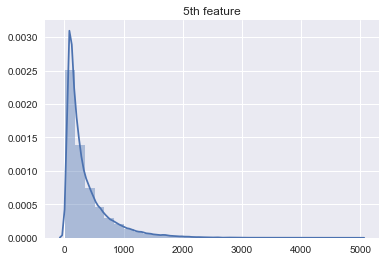

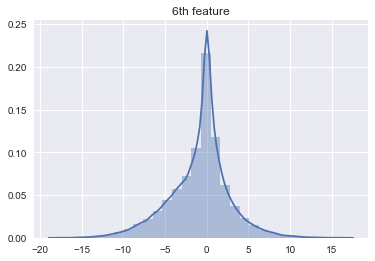

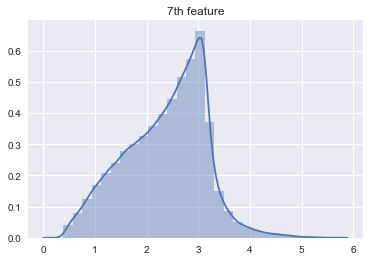

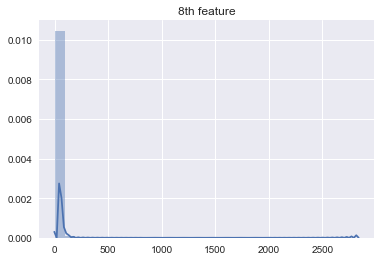

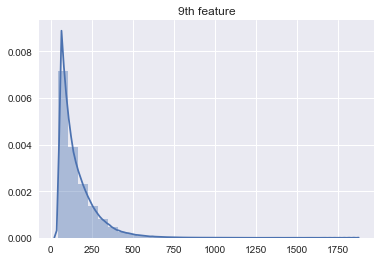

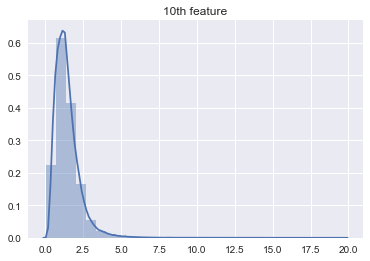

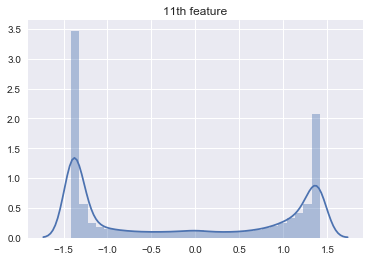

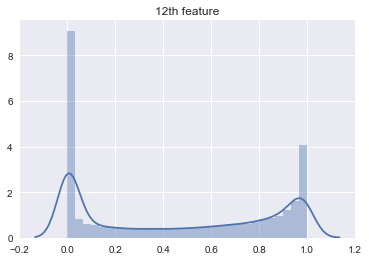

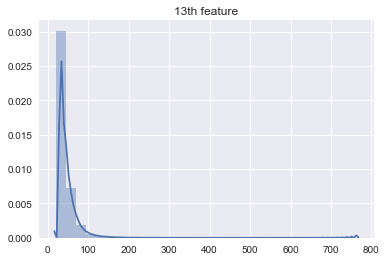

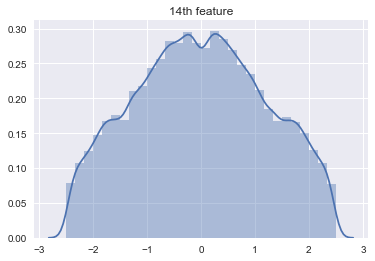

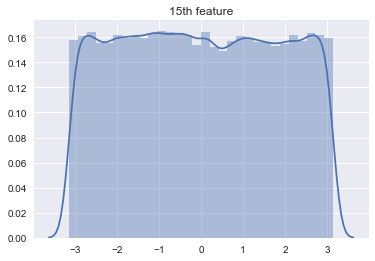

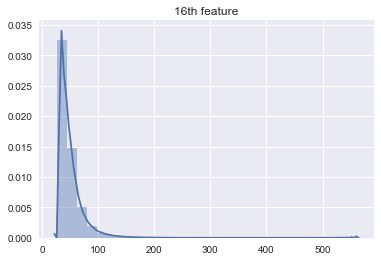

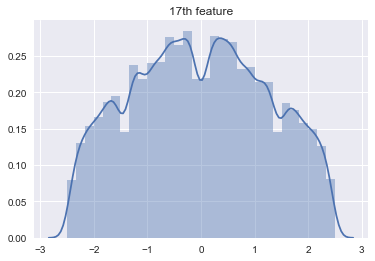

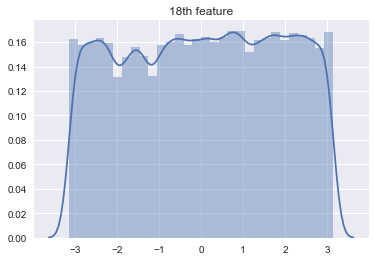

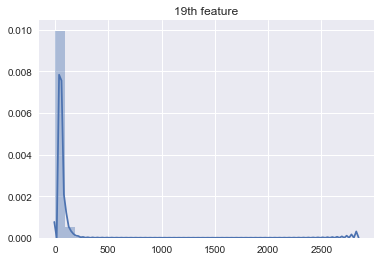

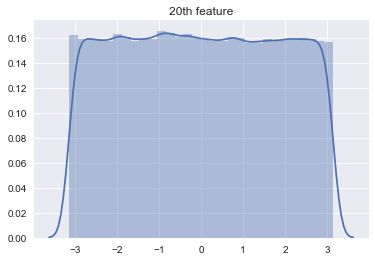

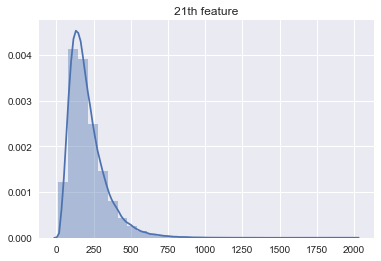

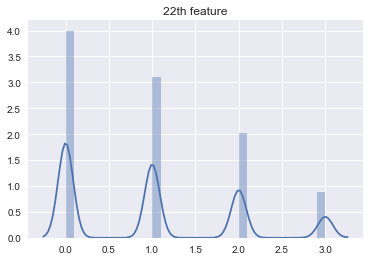

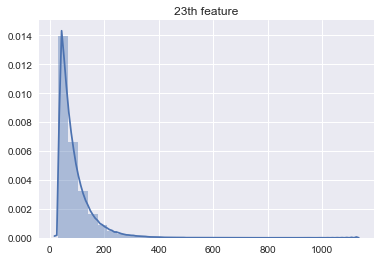

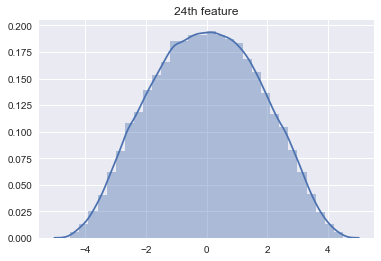

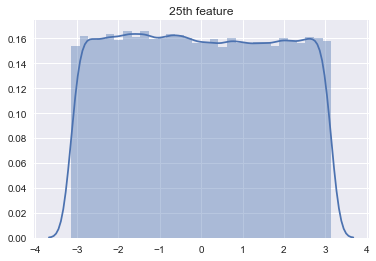

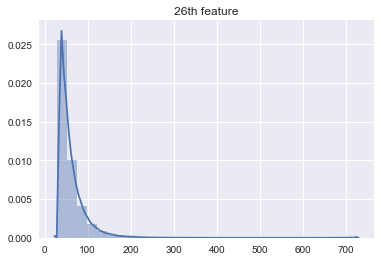

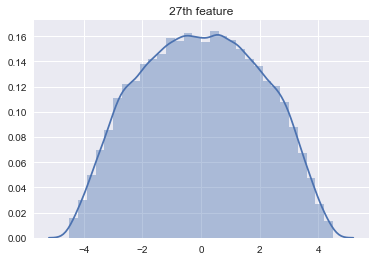

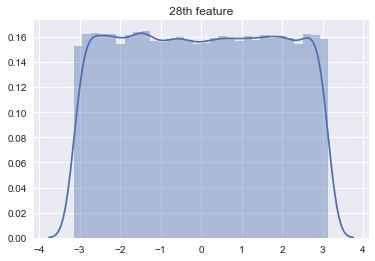

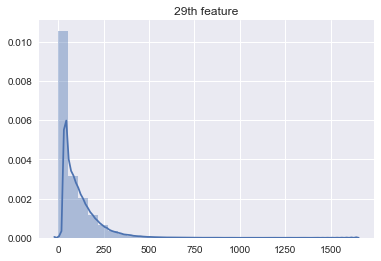

In [16]:
for i in which:
    feature = x[:,i]
    feature = feature[feature>-999]
#     hist_plot(feature,i)
    sns.distplot(feature,bins=30,kde=True)
    plt.title('{i}th feature'.format(i=i))
    plt.show()

### Single feature-response plots

Scatter plot for 0th feature :


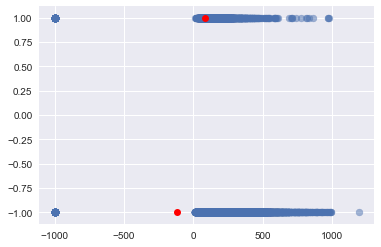

Scatter plot for 1th feature :


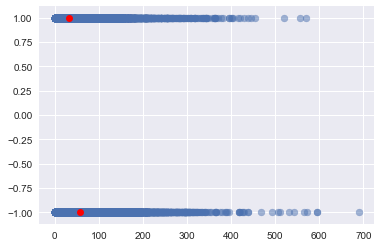

Scatter plot for 2th feature :


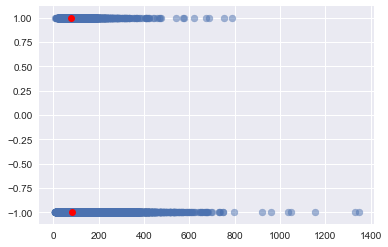

Scatter plot for 3th feature :


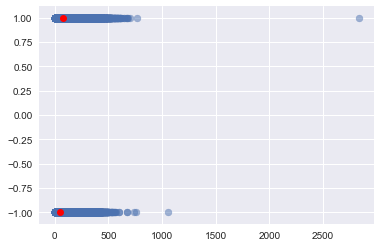

Scatter plot for 4th feature :


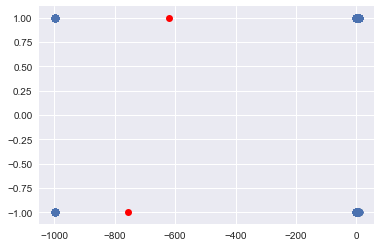

Scatter plot for 5th feature :


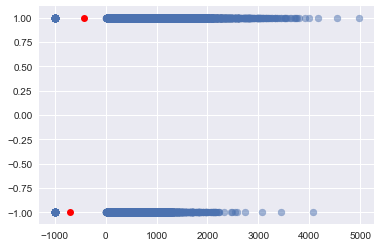

Scatter plot for 6th feature :


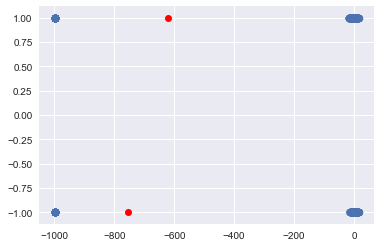

Scatter plot for 7th feature :


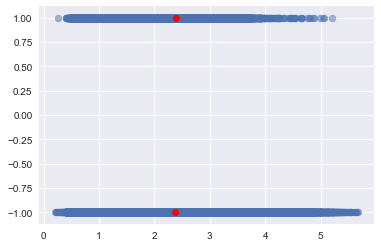

Scatter plot for 8th feature :


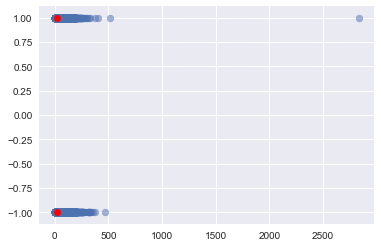

Scatter plot for 9th feature :


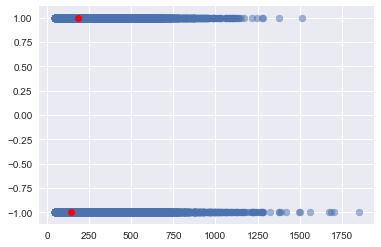

Scatter plot for 10th feature :


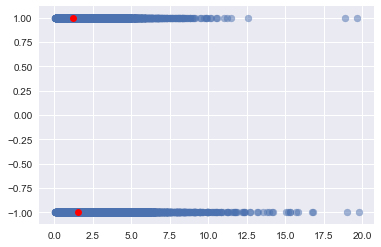

Scatter plot for 11th feature :


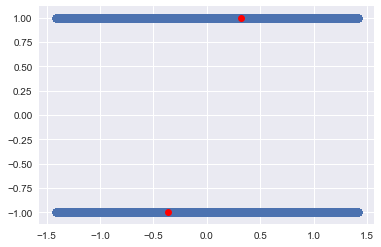

Scatter plot for 12th feature :


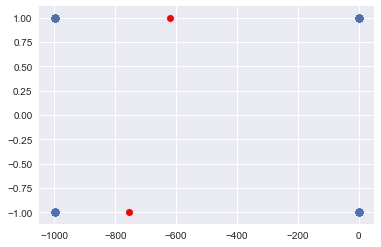

Scatter plot for 13th feature :


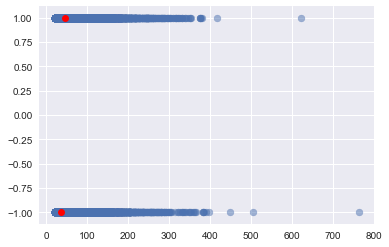

Scatter plot for 14th feature :


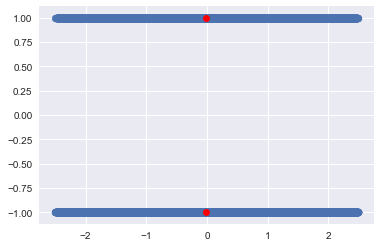

Scatter plot for 15th feature :


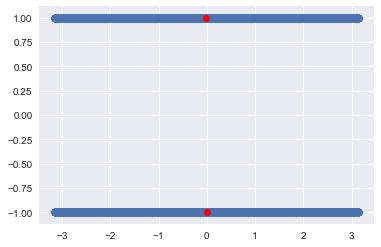

Scatter plot for 16th feature :


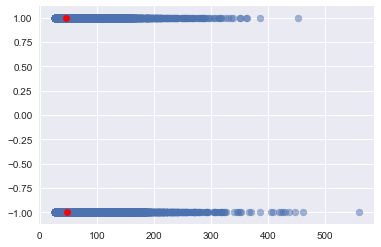

Scatter plot for 17th feature :


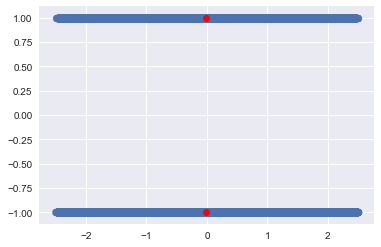

Scatter plot for 18th feature :


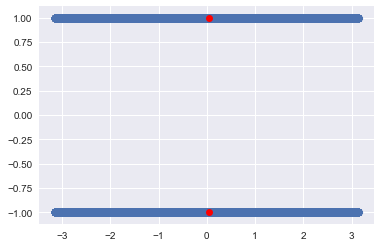

Scatter plot for 19th feature :


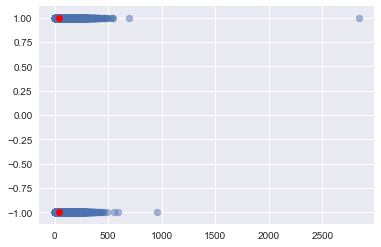

Scatter plot for 20th feature :


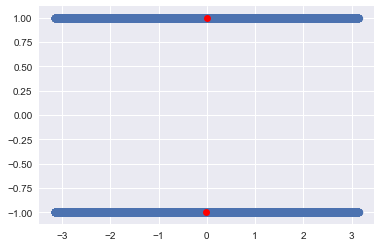

Scatter plot for 21th feature :


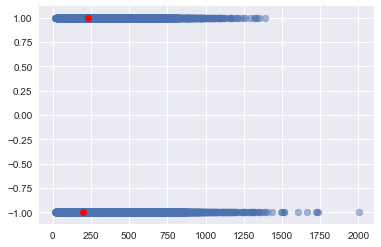

Scatter plot for 22th feature :


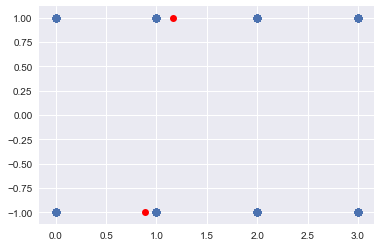

Scatter plot for 23th feature :


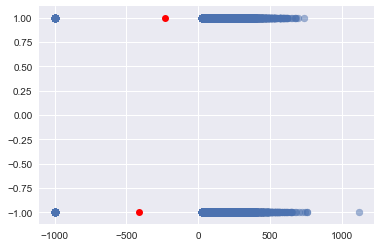

Scatter plot for 24th feature :


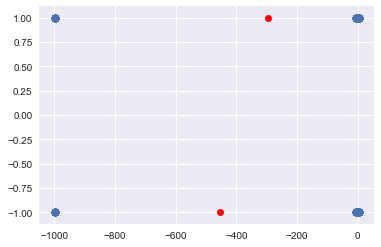

Scatter plot for 25th feature :


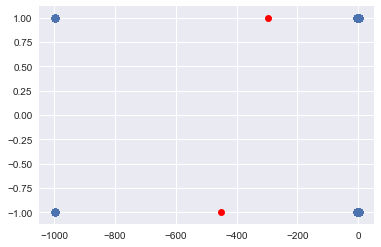

Scatter plot for 26th feature :


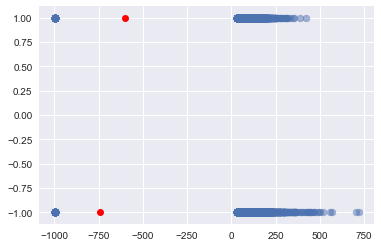

Scatter plot for 27th feature :


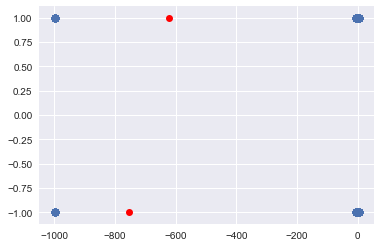

Scatter plot for 28th feature :


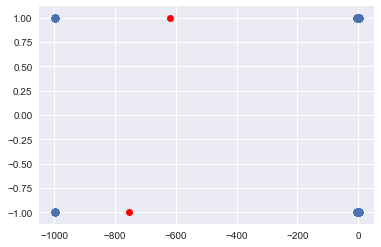

Scatter plot for 29th feature :


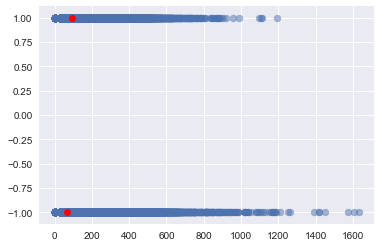

In [17]:
for i in which:
    print("Scatter plot for {i}th feature :".format(i=i))

    t = x[:,i]
    plt.scatter(t,y, alpha = 0.5)
    mean_x1 = np.mean(t[y == 1])
    mean_x0 = np.mean(t[y == -1])
    plt.plot(mean_x0,-1,"or")
    plt.plot(mean_x1,1,"or")
    plt.show()

### Feature boxplots
Visually check influence on response

In [8]:
for i in which:
    feature = x[:,i]
    print("Boxplot for {i}th feature :".format(i=i))
    plt.xlim(left = np.min(feature[feature>-999])-0.5)
    plt.xlim(right = np.max(feature[feature>-999])+.5)
    #the mean is dispayed as a triangle
    yes_feat = feature[y==1]
    no_feat = feature[y==-1]
    plt.boxplot(yes_feat[yes_feat>-999],vert = False, positions=[0],showmeans=True)
    plt.boxplot(no_feat[no_feat>-999], vert = False, positions=[-.25], showmeans=True)
    plt.show()
    


NameError: name 'which' is not defined

### Features with "too many" -999

Checked to eventually remove them.

In [7]:
for i in range(x.shape[1]):
    percentage = len(np.where(x[:,i] < -500)[0])/len(x[:,i])*100
    if percentage > 60:
        print("feature {i}: {percentage} of Na".format(i = i, percentage = percentage))

feature 4: 70.9828 of Na
feature 5: 70.9828 of Na
feature 6: 70.9828 of Na
feature 12: 70.9828 of Na
feature 26: 70.9828 of Na
feature 27: 70.9828 of Na
feature 28: 70.9828 of Na


## Regression

## Data loading

In [66]:
y_tr, X_tr, ids_tr = load_csv_data('/Users/Marie/Documents/Github/ML_course_Marie/Project_1/all/train.csv')
y_te, X_te, ids_te = load_csv_data('/Users/Marie/Documents/Github/ML_course_Marie/Project_1/all/test.csv')

## preliminary treatment

In [67]:
n,p = X_tr.shape
keepers = np.ones(p, dtype=bool)

y_tr[y_tr==-1] = 0
y_te[y_te==-1] = 0

for i in range(p):
    percentage = len(np.where(X_tr[:,i] ==-999)[0])/n*100
    if percentage > 70:
        keepers[i] = 0

print("Removed features: \n",np.where(keepers == 0))
x_tr = X_tr[:,keepers]
x_te = X_te[:,keepers]

n,p = x_tr.shape

Removed features: 
 (array([ 4,  5,  6, 12, 26, 27, 28]),)


In [ ]:
def standardize(x):
    mean_x = np.mean(x)
    x = x-mean_x
    std_x = np.std(x)
    x = x / std_x
    return x

In [ ]:
for i in range(1,tx.shape[1]):
    tx[:,i] = standardize(tx[:,i])

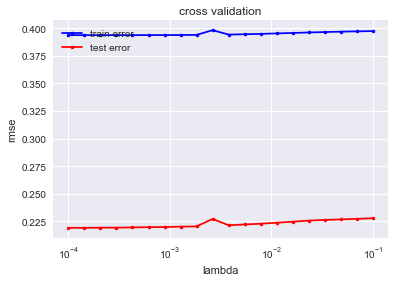

In [68]:
tx = np.c_[np.ones(n),x_tr]
n,p = tx.shape
w = np.zeros(p)
lambdas = np.logspace(-4, -1, 20)
k_fold = 5

# print(ridge_regression(y_tr, x_tr, 1))
w_cv, rmse_tr, rmse_te = cross_validation(y_tr, tx, k_fold, degree=4, lambdas=lambdas)

### Imputation of data

In [ ]:
def inputation(data, method = "mean"):
    '''
    input the missing values with the different methods: mean,median
    
    example of use: data_inputed = inputation(data,method = "median")
    
    for the moment only treat the features number 1,19,20,21 but could be easily generalized if felt necessary
    '''
    
    features_treated = [1,19,20,21]
    
    if method == "mean":
        for i in features_treated:
            t = data[:,i]
            mean = np.mean(t[t != -999])
            data_inputed = data.copy()
            data_inputed[data_inputed == -999] = mean
        
        return data_inputed
    
    if method == "median":
        for i in features_treated:
            t = data[:,i]
            mean = np.median(t[t != -999])
            data_inputed = data.copy()
            data_inputed[data_inputed == -999] = mean
        
        return data_inputed
    
        

In [ ]:
test_data = inputation(x,method = "mean")

### PANDAS

In [13]:
import os
import pandas as pd

In [14]:
path = '/Users/Marie/Documents/Github/ML_course_Marie/Project_1/all/'
os.chdir(path)

In [47]:
data_panda = pd.read_csv('train.csv')

In [48]:
data_panda.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [41]:
data_panda.dtypes

Id                               int64
Prediction                      object
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt       

In [51]:
### Columns which get deleated because of NAN:
data_panda=data_panda.replace(-999,np.nan)
data_panda.iloc[:,[6,7,8,14,28,29,30]].head()

,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_lep_eta_centrality,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi
0,0.91,124.711,2.666,0.2,46.062,1.24,-2.475
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


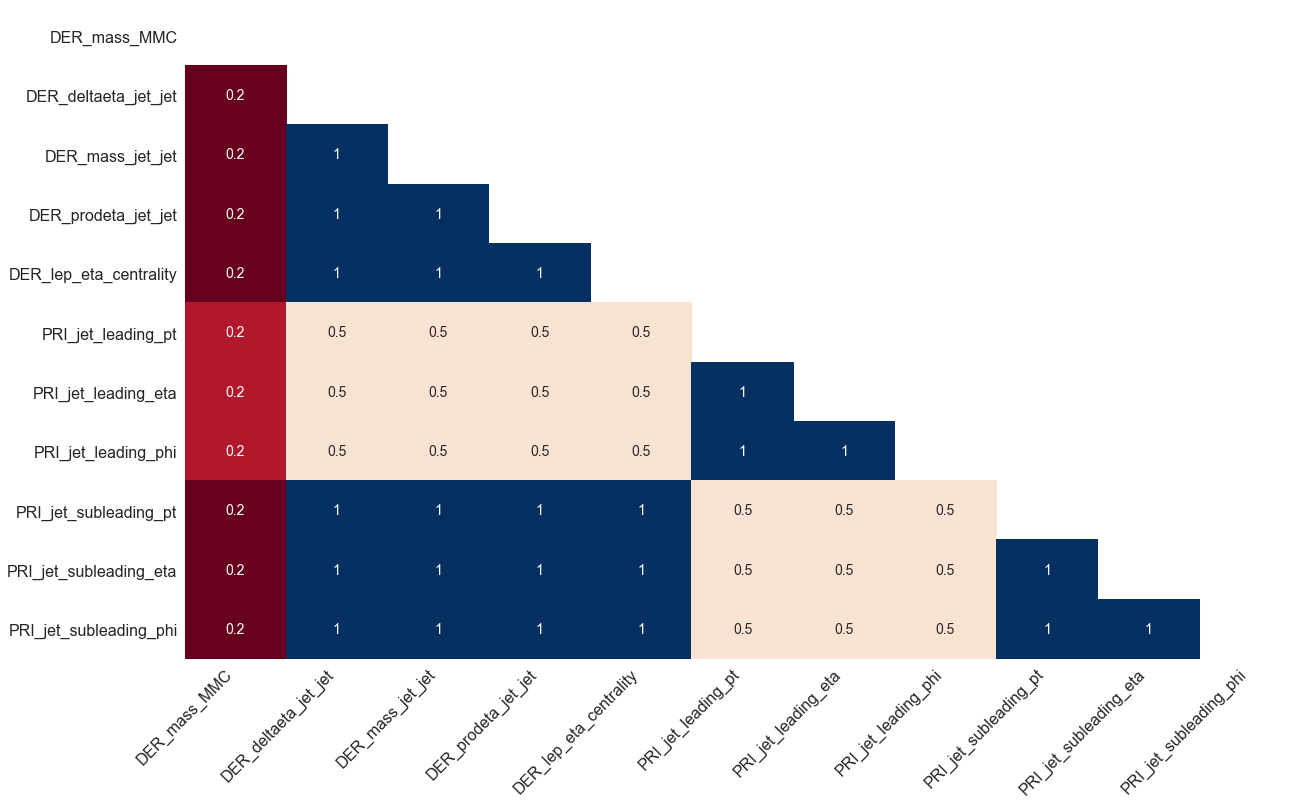

In [72]:
import missingno as msno
msno.heatmap(data_panda)

In [65]:
corr_all = data_panda.corr()
np.argwhere((abs(corr_all.values) > 0.8)&(~(corr_all.values==1)))-1

array([[ 0,  2],
       [ 2,  0],
       [ 3,  9],
       [ 3, 23],
       [ 3, 29],
       [ 4,  6],
       [ 6,  4],
       [ 9,  3],
       [ 9, 21],
       [ 9, 23],
       [ 9, 29],
       [21,  9],
       [21, 29],
       [22, 29],
       [23,  3],
       [23,  9],
       [23, 29],
       [29,  3],
       [29,  9],
       [29, 21],
       [29, 22],
       [29, 23]])

In [57]:
data_clean=data_panda.iloc[:,[2,3,4,5,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,31]]

In [58]:
data_clean.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,...,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,113.497
1,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,...,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,46.226
2,NaN,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,...,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,44.251
3,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,...,-0.522,-3.100,31.082,0.060,86.062,0,NaN,NaN,NaN,0.000
4,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,...,0.798,1.569,2.723,-0.871,53.131,0,NaN,NaN,NaN,0.000


In [59]:
data_clean.iloc[:,[0,1,2,20,21,22]].head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,2.150,0.444,113.497
1,160.937,68.768,103.235,0.725,1.158,46.226
2,NaN,162.172,125.953,2.053,-2.028,44.251
3,143.905,81.417,80.943,NaN,NaN,0.000
4,175.864,16.915,134.805,NaN,NaN,0.000


In [60]:
test1= data_clean.isnull().any(axis=1)
print(len(test1),len(test1[test1==True]), len(test1)-len(test1[test1==True]))

250000 111904 138096


In [61]:
corr = data_clean.corr()
np.argwhere((abs(corr.values) > 0.8)&(~(corr.values==1)))

array([[ 0,  2],
       [ 2,  0],
       [ 3,  6],
       [ 3, 19],
       [ 3, 22],
       [ 6,  3],
       [ 6, 17],
       [ 6, 19],
       [ 6, 22],
       [17,  6],
       [17, 22],
       [18, 22],
       [19,  3],
       [19,  6],
       [19, 22],
       [22,  3],
       [22,  6],
       [22, 17],
       [22, 18],
       [22, 19]])

In [64]:
corr.head(10)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
DER_mass_MMC,1.000000,0.221152,0.911795,0.023743,0.497405,0.013584,0.124621,0.070503,0.020316,0.265951,...,0.003538,-0.003216,0.100093,-0.000081,0.088447,0.015205,0.006454,0.002453,0.006588,0.011093
DER_mass_transverse_met_lep,0.221152,1.000000,0.190109,-0.249116,0.043251,0.017758,-0.146837,0.349504,-0.419757,-0.145464,...,-0.006777,0.000340,0.183716,-0.015925,-0.167811,-0.210537,-0.145892,0.000072,0.006824,-0.210009
DER_mass_vis,0.911795,0.190109,1.000000,-0.062562,0.579712,-0.000702,0.088685,0.097490,-0.090846,0.290011,...,0.002196,-0.002018,-0.087330,-0.001467,0.053300,-0.026860,-0.076472,0.002569,0.005583,-0.052902
DER_pt_h,0.023743,-0.249116,-0.062562,1.000000,-0.539379,0.310501,0.832733,0.089187,0.539356,0.407421,...,0.008354,-0.002923,0.679585,0.008585,0.782547,0.623401,0.826278,0.002842,0.000993,0.808616
DER_deltar_tau_lep,0.497405,0.043251,0.579712,-0.539379,1.000000,-0.148081,-0.432603,0.047046,-0.205441,-0.202035,...,0.000699,-0.000776,-0.402345,-0.001570,-0.407002,-0.347904,-0.483625,-0.000157,0.006808,-0.448737
DER_pt_tot,0.013584,0.017758,-0.000702,0.310501,-0.148081,1.000000,0.381160,0.039193,0.178448,0.095754,...,0.007987,-0.004249,0.269739,0.002515,0.448925,0.360409,0.224787,-0.006168,0.004233,0.403382
DER_sum_pt,0.124621,-0.146837,0.088685,0.832733,-0.432603,0.381160,1.000000,0.108791,0.420679,0.485847,...,0.008781,-0.001892,0.520129,0.006712,0.904481,0.758503,0.879027,0.000969,0.003139,0.965628
DER_pt_ratio_lep_tau,0.070503,0.349504,0.097490,0.089187,0.047046,0.039193,0.108791,1.000000,-0.038803,-0.474633,...,0.002357,-0.005053,0.053386,-0.001186,0.049904,0.056312,0.074943,0.003227,-0.000534,0.079116
DER_met_phi_centrality,0.020316,-0.419757,-0.090846,0.539356,-0.205441,0.178448,0.420679,-0.038803,1.000000,0.140885,...,0.012423,0.000278,0.180756,0.009896,0.423363,0.490057,0.269991,0.005284,0.000005,0.452224
PRI_tau_pt,0.265951,-0.145464,0.290011,0.407421,-0.202035,0.095754,0.485847,-0.474633,0.140885,1.000000,...,0.000053,0.003052,0.176665,0.003296,0.448763,0.205604,0.367877,0.000581,0.004169,0.321341


In [63]:
corr_all.head(10)

,Id,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,1.000000,-0.000214,-0.006059,-0.001851,0.002073,0.003741,0.002357,-0.004765,-0.001349,-0.000581,...,-0.001141,0.002312,0.000175,0.002797,0.002993,0.002165,-0.000039,-0.002718,0.003632,0.001024
DER_mass_MMC,-0.000214,1.000000,0.221152,0.911795,0.023743,-0.027467,-0.021716,0.018621,0.497405,0.013584,...,-0.000081,0.088447,0.015205,0.006454,0.002453,0.006588,-0.016114,0.004979,-0.001914,0.011093
DER_mass_transverse_met_lep,-0.006059,0.221152,1.000000,0.190109,-0.249116,-0.134007,-0.132298,0.123520,0.043251,0.017758,...,-0.015925,-0.167811,-0.210537,-0.145892,0.000072,0.006824,-0.036199,0.001802,0.006880,-0.210009
DER_mass_vis,-0.001851,0.911795,0.190109,1.000000,-0.062562,-0.039032,-0.055280,0.032945,0.579712,-0.000702,...,-0.001467,0.053300,-0.026860,-0.076472,0.002569,0.005583,-0.049472,0.002181,-0.000688,-0.052902
DER_pt_h,0.002073,0.023743,-0.249116,-0.062562,1.000000,-0.037698,0.188946,-0.026260,-0.539379,0.310501,...,0.008585,0.782547,0.623401,0.826278,0.002842,0.000993,0.360062,0.000192,-0.007824,0.808616
DER_deltaeta_jet_jet,0.003741,-0.027467,-0.134007,-0.039032,-0.037698,1.000000,0.797181,-0.835993,0.030562,-0.148028,...,-0.003103,-0.141291,-0.175495,-0.043514,-0.002005,-0.000819,-0.090497,-0.004843,0.001234,-0.108775
DER_mass_jet_jet,0.002357,-0.021716,-0.132298,-0.055280,0.188946,0.797181,1.000000,-0.763316,-0.119081,-0.036482,...,0.001166,0.163529,-0.074390,0.283724,-0.000732,0.000983,0.235312,-0.003059,-0.002185,0.240043
DER_prodeta_jet_jet,-0.004765,0.018621,0.123520,0.032945,-0.026260,-0.835993,-0.763316,1.000000,0.010708,0.110272,...,0.002677,0.047484,0.123566,-0.026637,-0.003548,-0.003038,0.002877,-0.002528,0.002133,0.018037
DER_deltar_tau_lep,-0.001349,0.497405,0.043251,0.579712,-0.539379,0.030562,-0.119081,0.010708,1.000000,-0.148081,...,-0.001570,-0.407002,-0.347904,-0.483625,-0.000157,0.006808,-0.231997,0.001928,0.007244,-0.448737
DER_pt_tot,-0.000581,0.013584,0.017758,-0.000702,0.310501,-0.148028,-0.036482,0.110272,-0.148081,1.000000,...,0.002515,0.448925,0.360409,0.224787,-0.006168,0.004233,0.320082,0.000730,-0.004807,0.403382


In [12]:
corr.values[(abs(corr)>0.7)&(~(corr.values==1))]

array([0.91179511, 0.91179511, 0.83273307, 0.78254697, 0.82627761,
       0.80861626, 0.83273307, 0.90448146, 0.75850337, 0.87902697,
       0.96562839, 0.70114222, 0.70114222, 0.78254697, 0.90448146,
       0.70588167, 0.79377594, 0.88441286, 0.75850337, 0.70588167,
       0.80432559, 0.82627761, 0.87902697, 0.79377594, 0.87834684,
       0.80861626, 0.96562839, 0.88441286, 0.80432559, 0.87834684])

In [30]:
test= data_clean.isnull().any(axis=1)
print(len(test),len(test[test==True]), len(test)-len(test[test==True]))

250000 111904 138096


In [38]:
data_clean.iloc[:,[19,20,21]].head()

,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi
0,67.435,2.150,0.444
1,46.226,0.725,1.158
2,44.251,2.053,-2.028
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [44]:
test2 = data_clean.iloc[:,[19]].isnull().any(axis=1)
len(test2[test2==True])

99913

In [21]:
data_clean_no19 = data_clean.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,20,21,22,22]]
data_clean_no19.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_pt,PRI_lep_eta,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,...,51.626,2.273,16.824,-0.277,258.733,2,2.150,0.444,113.497,113.497
1,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,...,36.918,0.501,44.704,-1.916,164.546,1,0.725,1.158,46.226,46.226
2,NaN,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,...,121.409,-0.953,54.283,-2.186,260.414,1,2.053,-2.028,44.251,44.251
3,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,...,53.321,-0.522,31.082,0.060,86.062,0,NaN,NaN,0.000,0.000
4,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,...,29.774,0.798,2.723,-0.871,53.131,0,NaN,NaN,0.000,0.000


In [20]:
x= data_clean_no19.isnull().any(axis=1)
print(len(x),len(x[x==True]))

250000 111904


## Fit a model on all columns except on the ones with phi

In [37]:
y, X, ids = load_csv_data('../Data/train.csv')

In [75]:
y

array([ 1., -1., -1., ...,  1., -1., -1.])

In [117]:
y[y==-1] = 0

In [106]:
##delete the columns containing phi
X_nophi = np.delete(X,[11,15,18,20,25,28],1)


In [110]:
#impute missing data
X_nophi_impute = inputation(X_nophi,method = "median", features_treated = "all")

In [111]:
#standardize the data
X_nophi_std = standardize_data(X_nophi_impute)

In [112]:
X_nophi_std

array([[ 0.48104928,  0.06833197,  0.40768027, ...,  0.03004441,
        -1.49333569,  0.4125105 ],
       [ 0.8535607 ,  0.55250482,  0.54013641, ..., -0.26343246,
         0.63823937, -0.27381996],
       [-1.1431234 ,  3.19515553,  1.09655998, ..., -0.26343246,
         0.63823937, -0.29396985],
       ...,
       [-0.06631884,  0.31931645, -0.13086367, ..., -0.26343246,
         0.63823937, -0.31701723],
       [-0.24051233, -0.84532397, -0.30297338, ..., -0.26343246,
         0.63823937, -0.74543941],
       [-1.1431234 ,  0.66533608, -0.25352276, ..., -0.26343246,
         0.63823937, -0.74543941]])

In [144]:
#transform to tx
tx = build_poly(X_nophi_std, 1)

In [86]:
tx.shape

(250000, 25)

In [87]:
#learn the model
#W = least_squares(y, tx)
w = np.linalg.solve(tx.T.dot(tx),tx.T.dot(y))

In [88]:
print(w.shape)
w

(25,)


array([-3.14664000e-01,  3.80575793e-02, -2.64614311e-01, -2.64102210e-01,
        5.08823124e-02, -3.93394335e-01,  2.95389094e-01, -1.15738057e+01,
        2.84054092e-01,  2.70136691e-03, -2.97062963e+02, -1.96240568e-01,
        1.50824530e+01,  5.77148133e+01, -1.60129388e-04,  5.69356739e+01,
       -5.58863291e-04,  1.00167308e-01, -5.99537965e-02, -2.10644950e-01,
       -1.50666213e-01,  3.32407613e-01,  5.19598251e-02, -3.22391140e+00,
        2.51550455e+02])

## Cross validation without phi


[<function ridge_regression at 0x10f859950>, 5.623413251903491e-05] [<function id at 0x10f7a87b8>, []]


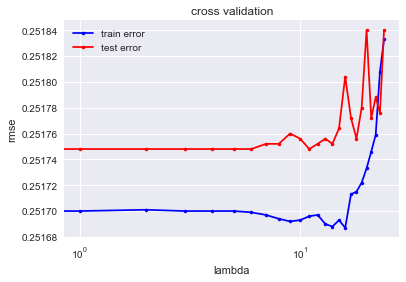

In [145]:
tx = build_poly(X_nophi_std, 1)
y_tr = y
w = np.zeros(tx.shape[1])
# lambdas = [10**(-5.5625)]
lambdas = np.logspace(-8,-3.5,25)
k_fold = 5

transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=2)

print(method, transformation)

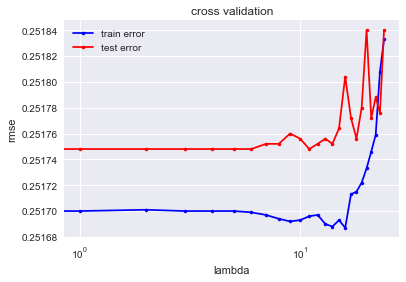

In [134]:
#get the best parameters

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=2, only_best=True)

In [135]:
w

array([ 0.34262773,  0.02713261, -0.13246956, -0.15035999,  0.03194208,
        0.05738455,  0.05806854, -0.22293533,  0.14404773,  0.00138395,
       -0.00143293, -0.09926129,  0.17236877,  0.08633523,  0.00059605,
        0.14454165,  0.00061488,  0.04158263, -0.02856984, -0.09525627,
       -0.00354886, -0.09038063,  0.0033514 , -0.08072727, -0.05393636])

## Cross validation with phi but without the nan columns

In [102]:
x_tr_nanout = np.delete(X,[4,5,6,12,26,27,28],1)

x_tr = inputation(x_tr_nanout,method = "median")

[<function ridge_regression at 0x10f859950>, 0.00031622776601683794] [<function id at 0x10f7a87b8>, []]


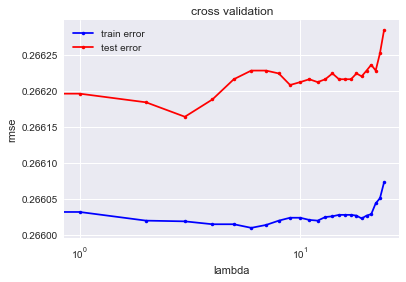

In [118]:
tx = build_poly(x_tr, 1)
y_tr = y
w = np.zeros(tx.shape[1])
# lambdas = [10**(-5.5625)]
lambdas = np.logspace(-8,-3.5,25)
k_fold = 5

transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=2)

print(method, transformation)

## Prediction test

In [105]:
def predict_labels(w,tx):
    return tx.dot(w)

In [89]:
y_test, x_all_test, ids_test = load_csv_data('../Data/test.csv')


In [124]:
#delete the phi columns
x_test = np.delete(x_all_test,[11,15,18,20,25,28],1)

In [125]:
x_test = inputation(x_test,method = "median", features_treated = "all")
x_test = standardize_data(x_test)
tx = build_poly(x_test, 1)
tx.shape

(568238, 25)

In [126]:
y_pred = predict_labels(w,tx)
y_predict = categories(y_pred)

In [127]:
y_pred

array([-0.05571909,  0.16469452,  0.356913  , ...,  0.52096213,
        0.44875307,  0.14799981])

In [128]:
y_predict

array([0., 0., 0., ..., 1., 0., 0.])

In [129]:
create_csv_submission(ids_test, y_pred, "../Data/test_Marie.csv")